# Grating Coupler Design - Jupyter Notebook

---

## 1D Grating Coupler Design
In this notebook, we will derive and calculate the key parameters required to design a 1D grating coupler.   
Grating couplers are essential components in photonic circuits for coupling light between fiber and chip.

---

## Importing Necessary Libraries
Import essential libraries for numerical calculations and plotting.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown


## Design Parameters
Let's define key parameters for the grating coupler design. You can change these values as per your requirements.

### 1. Calculating the Coupling Angle using Snell's Law
In this section, you’ll use Snell's Law to determine the coupling angle, which is essential for the grating coupler's design. The light is refracted from the air to the waveguide cladding.

#### **Snell's law**
$$ n_{air} \sin(\theta_{in}) =  n_{clad} \sin(\theta_{out})$$

In [60]:
# Refractive indices
n_air = 1.0          # Refractive index of air
n_cladding = 1.444   # Substitute with actual cladding refractive index

# Input angle in degrees
theta_in_deg = 12    # Example angle, adjust as necessary
theta_in_rad = np.radians(theta_in_deg)

# Calculate output angle using Snell's law
theta_out_rad = np.arcsin((n_air / n_cladding) * np.sin(theta_in_rad))
theta_out_deg = np.degrees(theta_out_rad)

print(f"Output angle (θ_out): {theta_out_deg:.2f} degrees")


Output angle (θ_out): 8.28 degrees


### 2. Define the grating coupler parameters

If we denote the effective index of the grating teeth as neff1 , and the effective
index of the grating slots as neff2 , then the effective index of the grating region can be
expressed as:

$$ n_{\text{eff}} = DC\cdot n_{\text{eff}_1} + (1-DC)\cdot n_{\text{eff}_2} $$

In [73]:
# Wavelength of the input light in microns
wavelength = 1.55  # microns

# Effective index of the waveguide mode (estimated)
n_eff1 = 2.8488     # for the waveguide mode [i.e. 220nm thickness]
n_eff2 = 2.2703     # for the slab mode [i.e. 110nm thickness]

# Assuming a duty cycle of 50%
duty_cycle = 0.5

# Calculating the average refractive index of the grating
n_eff = duty_cycle * n_eff1 + (1 - duty_cycle) * n_eff2

# Refractive index of the cladding (e.g., air or oxide)
n_clad = 1.444

# Coupling angle of the grating (in degrees, with respect to normal incidence)
theta_coupler = theta_out_deg
print(f"The average effective index of the grating (n_eff): {n_eff:.2f} ")

The average effective index of the grating (n_eff): 2.56 


### 3. Calculating the Grating Period
The grating period can be calculated using the phase-matching condition:
 
$$ \Lambda = \frac{\lambda_0}{n_{\text{eff}} - n_{\text{clad}} \sin(\theta_{\text{coupler}})} $$
 
Where:
- $\lambda_0$ is the wavelength of light in free space
- $n_{\text{eff}}$ is the effective index of the waveguide mode
- $n_{\text{clad}}$ is the refractive index of the cladding
- $\theta_{\text{coupler}}$ is the coupling angle

In [74]:
# Convert coupling angle to radians for calculation
theta_rad = np.radians(theta_coupler)

# Calculate the grating period
grating_period = wavelength / (n_eff - n_clad * np.sin(theta_rad))
print(f"Grating Period (Λ): {grating_period:.3f} microns")

Grating Period (Λ): 0.659 microns


### 4. Grating Coupler Efficiency
A rough estimate of the grating coupler efficiency can be made by considering factors such as the overlap between the fiber mode and the grating mode, radiation angle, and scattering losses.
 
Here, we will assume a simple model for efficiency $\eta$ based on the overlap of mode profiles and material losses.

In [75]:
# Coupling efficiency parameter (empirical, varies based on design, generally between 0.5 and 0.9)
overlap_factor = 0.7  

# Assuming an arbitrary material loss factor for simplicity
material_loss_factor = 0.9

# Calculate the efficiency
efficiency = overlap_factor * material_loss_factor
print(f"Estimated Grating Coupler Efficiency: {efficiency * 100:.2f}%")

Estimated Grating Coupler Efficiency: 63.00%


### 5. Visualizing the Grating Coupler Structure
Let’s plot the basic grating structure, illustrating the period and duty cycle for clarity.

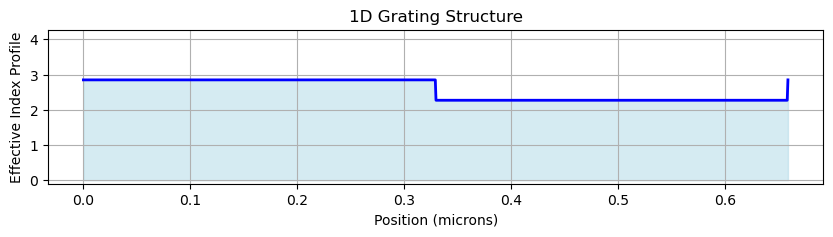

In [76]:
# Define x-axis for one period
x = np.linspace(0, grating_period, 1000)

# Define the grating structure with duty cycle
y = np.where((x % grating_period) < (duty_cycle * grating_period), n_eff1, n_eff2)
# Plotting the grating structure
plt.figure(figsize=(10, 2))
plt.plot(x, y, color='blue', linewidth=2)
plt.fill_between(x, y, color='lightblue', alpha=0.5)
plt.title("1D Grating Structure")
plt.xlabel("Position (microns)")
plt.ylabel("Effective Index Profile")
plt.ylim(-0.1, 1.5*n_eff1)
plt.grid(True)
plt.show()

In [77]:
summary_md = f"""
---
## Summary of Results
- **Grating Period (Λ):** {grating_period:.3f} microns
- **Duty Cycle (DC):** {duty_cycle:.3f}
- **Estimated Coupling Efficiency:** {efficiency * 100:.2f}%


---
"""

display(Markdown(summary_md))


---
## Summary of Results
- **Grating Period (Λ):** 0.659 microns
- **Duty Cycle (DC):** 0.500
- **Estimated Coupling Efficiency:** 63.00%


---
